In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
nombre ='/Users/rodrigojuarez/Downloads/2021-10-27-14-29-24-CDT-search-csv-export.csv'
df = pd.read_csv(nombre, sep='\t')

/Users/rodrigojuarez/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.dtypes

Page Name                                                                                                              object
User Name                                                                                                              object
Facebook Id                                                                                                             int64
Page Category                                                                                                          object
Page Admin Top Country                                                                                                 object
Page Description                                                                                                       object
Page Created                                                                                                           object
Likes at Posting                                                                                                      

In [6]:
df['month'] = pd.DatetimeIndex(df['Post Created Date']).month
df['day'] = pd.DatetimeIndex(df['Post Created Date']).day
df['week']= pd.DatetimeIndex(df['Post Created Date']).weekofyear
df['hour']=pd.DatetimeIndex(df['Post Created Time']).hour

<ipython-input-6-58be8addc9dc>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week']= pd.DatetimeIndex(df['Post Created Date']).weekofyear


# **Línea de tiempo y frecuencia de publicaciones**

La línea de tiempo va desde el 15 de agosto al 27 de octubre del 2021

In [7]:
min(df['Post Created Date'])

'2021-08-15'

In [8]:
max(df['Post Created Date'])

'2021-10-27'

Podemos observar la frecuencia de publicaciones por día, sin embargo, podríamos hacerlo por semana o por mes también.

In [9]:
df_byDate=df.groupby(by=['Post Created Date']).count()
post_byDay=df_byDate['Post Created']
print(post_byDay)

Post Created Date
2021-08-15    2023
2021-08-16    5751
2021-08-17    6760
2021-08-18    7590
2021-08-19    5084
              ... 
2021-10-23    1804
2021-10-24    2146
2021-10-25    4749
2021-10-26    4709
2021-10-27    1813
Name: Post Created, Length: 74, dtype: int64


Haciendo un análisis de la base de datos, observamos que en promedio hay 4054 posts por día, un máximo de 7590 y un mínimo de 1736.

In [10]:
post_byDay.describe()

count      74.000000
mean     4054.027027
std      1359.556565
min      1736.000000
25%      2791.750000
50%      4306.500000
75%      4868.000000
max      7590.000000
Name: Post Created, dtype: float64

AttributeError: 'Series' object has no attribute 'idmax'

La gráfica general (total) del número de post por día se verá así:

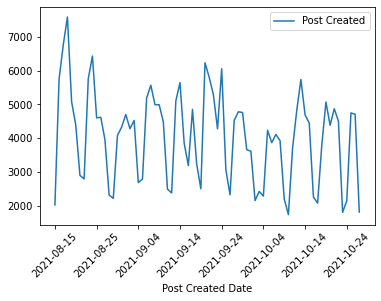

In [12]:
df_byDate.plot(y='Post Created', use_index=True)
plt.xticks(rotation = 45)
plt.show()

Podemos, sin embargo, hacer un análisis por mes de la frecuencia de publicaciones.

**Frecuencia de publicaciones de agosto**

<AxesSubplot:xlabel='day'>

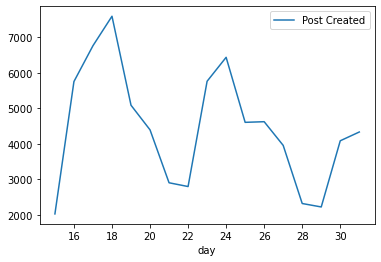

In [13]:
df_aug=df[df.month == 8]
df_aug_grouped=df_aug.groupby(by=['day']).count()
df_aug_grouped.plot(y='Post Created', use_index=True)

In [14]:
df_aug_grouped['Post Created'].describe()

count      17.000000
mean     4447.470588
std      1657.447251
min      2023.000000
25%      2900.000000
50%      4390.000000
75%      5751.000000
max      7590.000000
Name: Post Created, dtype: float64

**Frecuencia de publicaciones de septiembre**

<AxesSubplot:xlabel='day'>

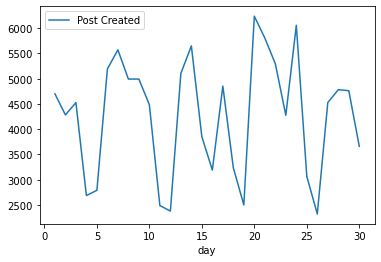

In [15]:
df_sep=df[df.month == 9]
df_sep_grouped=df_sep.groupby(by=['day']).count()
df_sep_grouped.plot(y='Post Created', use_index=True)

In [16]:
df_sep_grouped['Post Created'].describe()

count      30.000000
mean     4275.300000
std      1180.572922
min      2324.000000
25%      3202.250000
50%      4526.500000
75%      5076.000000
max      6235.000000
Name: Post Created, dtype: float64

**Frecuencia de publicaciones de octubre**

<AxesSubplot:xlabel='day'>

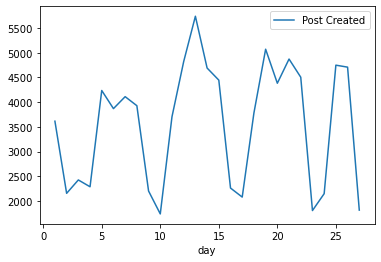

In [17]:
df_oct=df[df.month == 10]
df_oct_grouped=df_oct.groupby(by=['day']).count()
df_oct_grouped.plot(y='Post Created', use_index=True)

In [18]:
df_oct_grouped['Post Created'].describe()

count      27.000000
mean     3560.444444
std      1238.510064
min      1736.000000
25%      2230.000000
50%      3869.000000
75%      4598.000000
max      5740.000000
Name: Post Created, dtype: float64

**Frecuencia de publicaciones por semana**

<AxesSubplot:xlabel='week'>

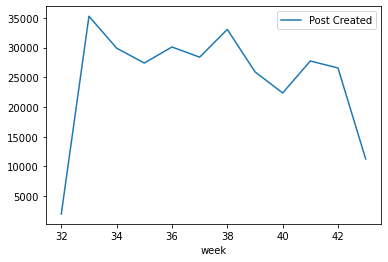

In [19]:
df_week_grouped=df.groupby(by=['week']).count()
df_week_grouped.plot(y='Post Created', use_index=True)

In [20]:
df_week_grouped['Post Created'].describe()

count       12.000000
mean     24999.833333
std       9399.129658
min       2023.000000
25%      25033.750000
50%      27570.000000
75%      29951.250000
max      35269.000000
Name: Post Created, dtype: float64

# **Análisis de hora de publicación**

**Post creados por hora:**

In [21]:
df['hour'] = pd.DatetimeIndex(df['Post Created Time']).hour

In [22]:
df_hour_grouped=df.groupby(by=['hour']).count()

In [23]:
df_hour_grouped['Post Created']

hour
0      3181
1      1678
2       958
3       618
4       636
5      1020
6      3071
7      8131
8     14668
9     20269
10    23532
11    23988
12    23059
13    22276
14    19867
15    18477
16    17177
17    16818
18    17121
19    16541
20    15932
21    13254
22    10785
23     6941
Name: Post Created, dtype: int64

<AxesSubplot:xlabel='hour'>

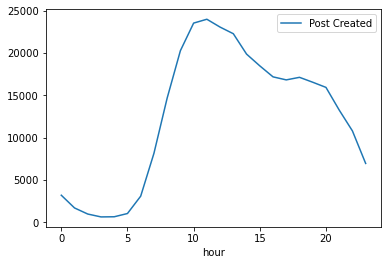

In [24]:
df_hour_grouped.plot(y='Post Created', use_index=True)

**Suma de reacciones por hora:**

In [25]:
df_hour_grouped_sum=df.groupby(by=['hour']).sum()

In [26]:
df_hour_grouped_sum.head()

Facebook Id  Likes at Posting  Followers at Posting     Likes  \
hour                                                                   
0     1.755042e+18       992634713.0          1.293508e+09  105108.0   
1     8.790233e+17       469585234.0          5.760623e+08   66681.0   
2     4.396694e+17       359197782.0          4.285574e+08   26578.0   
3     2.924978e+17       300989729.0          3.829060e+08   24731.0   
4     3.081673e+17       419709574.0          5.024438e+08   36832.0   

      Comments   Shares     Love     Wow     Haha     Sad   Angry    Care  \
hour                                                                        
0      24434.0  38352.0  10424.0  5670.0  20583.0  2698.0  2952.0   861.0   
1      14541.0  27433.0  12938.0  4043.0   7140.0  5675.0  1742.0  1052.0   
2       4280.0  11181.0   4567.0  3294.0  12105.0  1633.0   418.0   278.0   
3       9707.0   8498.0   3236.0  1777.0  30695.0   714.0  2269.0   249.0   
4       6089.0   7378.0   3983.0  1540.0   2270.0  1437.0   532.0   325.0   

      Post Views  Total Views  Total Views For All Crossposts  Sponsor Id  \
hour                                                                        
0      1582389.0   21140748.0                       5280813.0         0.0   
1       379068.0   10850089.0                       1119752.0         0.0   
2       255954.0    1574170.0                       5304125.0         0.0   
3       323340.0    1660890.0                       4244083.0         0.0   
4        69243.0     496346.0                        678509.0         0.0   

        month      day      week  
hour                              
0     28835.0  53727.0  119012.0  
1     15199.0  28374.0   62722.0  
2      8725.0  16481.0   36041.0  
3      5652.0  10644.0   23376.0  
4      5795.0  10718.0   23923.0

## **Análisis de Sentimientos:**

**Suma de Likes por hora**

In [27]:
df_hour_grouped_sum['Likes'].sort_values(ascending=False)

hour
9     1275039.0
11    1268352.0
10    1245058.0
12    1233856.0
13    1179126.0
14    1026321.0
19     977149.0
16     968553.0
15     924292.0
18     920296.0
8      862939.0
20     830642.0
17     817907.0
7      779920.0
21     697925.0
22     621773.0
23     396364.0
6      180048.0
0      105108.0
1       66681.0
5       57629.0
4       36832.0
2       26578.0
3       24731.0
Name: Likes, dtype: float64

In [28]:
df_hour_grouped_sum['Likes'].describe()

count    2.400000e+01
mean     6.884633e+05
std      4.552060e+05
min      2.473100e+04
25%      1.613130e+05
50%      8.242745e+05
75%      9.894420e+05
max      1.275039e+06
Name: Likes, dtype: float64

<AxesSubplot:xlabel='hour'>

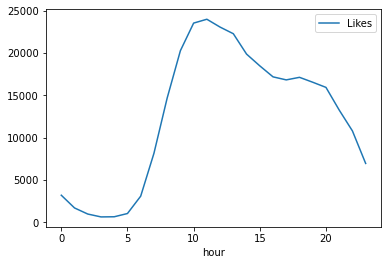

In [29]:
df_hour_grouped.plot(y='Likes', use_index=True)


**Likes Per Post:**

In [30]:
df_merge= df_hour_grouped_sum.merge(df_hour_grouped['Post Created'],on='hour')
df_merge['Likes per post']=df_merge['Likes']/df_merge['Post Created']
df_merge['Likes per post'].sort_values(ascending=False)


hour
7     95.919321
9     62.905866
19    59.074361
8     58.831402
6     58.628460
4     57.911950
22    57.651646
23    57.104740
5     56.499020
16    56.386622
18    53.752468
12    53.508652
13    52.932573
10    52.909145
11    52.874437
21    52.657688
20    52.136706
14    51.659586
15    50.023922
17    48.632834
3     40.017799
1     39.738379
0     33.042439
2     27.743215
Name: Likes per post, dtype: float64

In [31]:
df_merge['Likes per post'].describe()

count    24.000000
mean     53.439301
std      12.400089
min      27.743215
25%      51.250670
50%      53.220612
75%      57.716722
max      95.919321
Name: Likes per post, dtype: float64

<AxesSubplot:xlabel='hour'>

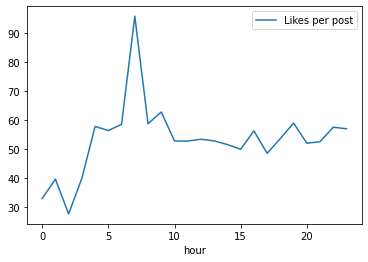

In [32]:
df_merge.plot(y='Likes per post', use_index=True)

**Comments Per Post:**

In [33]:
df_merge['Comments per post']=df_merge['Comments']/df_merge['Post Created']
df_merge['Comments per post'].sort_values(ascending=False)

hour
7     33.270323
9     17.126548
6     17.105503
22    16.307928
3     15.707120
23    15.095231
8     14.794314
13    14.601589
11    14.474821
12    14.166226
21    14.108118
20    14.030693
19    14.011668
10    13.765086
18    13.421821
16    13.410549
14    13.401419
15    13.216810
17    13.112855
4      9.573899
1      8.665673
5      8.576471
0      7.681232
2      4.467641
Name: Comments per post, dtype: float64

<AxesSubplot:xlabel='hour'>

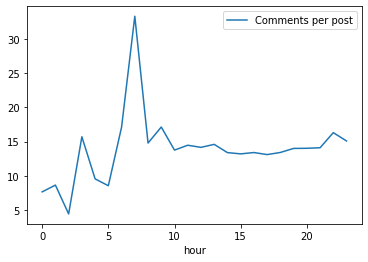

In [34]:
df_merge.plot(y='Comments per post', use_index=True)

**Shares Per Post:**

In [35]:
df_merge['Shares per post']=df_merge['Shares']/df_merge['Post Created']
df_merge['Shares per post'].sort_values(ascending=False)

hour
22    32.252944
7     29.246095
9     24.970645
19    24.881446
23    24.442155
18    21.887682
16    21.147465
13    20.946579
15    20.894193
17    20.866155
21    20.810397
14    20.782151
20    20.730919
11    20.196515
12    20.122599
8     18.600150
10    17.788883
1     16.348629
6     15.909476
3     13.750809
5     12.889216
0     12.056586
2     11.671190
4     11.600629
Name: Shares per post, dtype: float64

<AxesSubplot:xlabel='hour'>

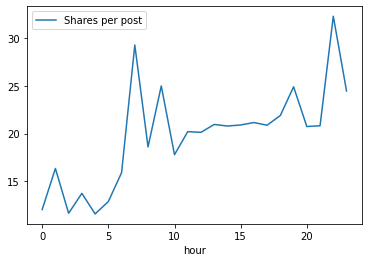

In [36]:
df_merge.plot(y='Shares per post', use_index=True)

**Love Reaction Per Post:**

In [37]:
df_merge['Love per post']=df_merge['Love']/df_merge['Post Created']
df_merge['Love per post'].sort_values(ascending=False)

hour
7     18.468331
6     10.740150
9      9.770931
19     9.032828
23     8.548768
11     8.104594
13     8.028596
18     8.002103
12     7.845830
22     7.723412
1      7.710369
16     7.366770
21     7.141014
10     6.997408
8      6.898146
14     6.788644
5      6.642157
15     6.284191
4      6.262579
20     6.186982
17     5.965989
3      5.236246
2      4.767223
0      3.276957
Name: Love per post, dtype: float64

<AxesSubplot:xlabel='hour'>

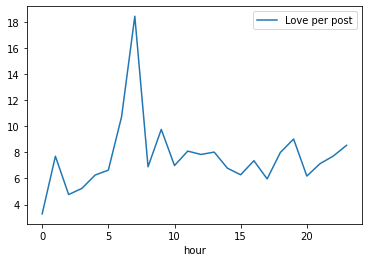

In [38]:
df_merge.plot(y='Love per post', use_index=True)

**Wow Reactions Per Post:**

In [39]:
df_merge['Wow per post']=df_merge['Wow']/df_merge['Post Created']
df_merge['Wow per post'].sort_values(ascending=False)

hour
23    3.902464
2     3.438413
22    3.078071
9     2.880310
3     2.875405
7     2.622310
4     2.421384
1     2.409416
16    2.390755
17    2.366631
6     2.193422
21    2.182964
19    2.147633
15    2.110462
11    2.040604
10    2.036249
5     2.020588
8     2.010704
14    1.957165
13    1.928129
12    1.904723
20    1.874404
18    1.782898
0     1.782458
Name: Wow per post, dtype: float64

<AxesSubplot:xlabel='hour'>

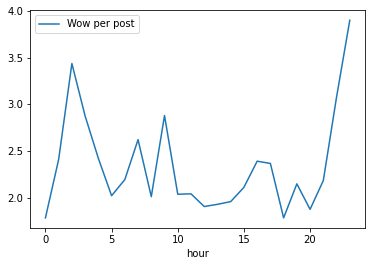

In [40]:
df_merge.plot(y='Wow per post', use_index=True)

**Haha reaction Per Post:**

In [41]:
df_merge['Haha per post']=df_merge['Haha']/df_merge['Post Created']
df_merge['Haha per post'].sort_values(ascending=False)

hour
3     49.668285
19    18.178405
2     12.635699
22    12.137228
14    11.750893
18    11.526254
7     10.192596
6     10.180723
23     8.865149
8      8.174257
9      8.129015
11     7.528514
10     7.496643
21     7.110533
12     6.900473
16     6.651802
0      6.470607
17     6.257760
20     6.222132
13     6.180194
15     5.146128
5      4.375490
1      4.255066
4      3.569182
Name: Haha per post, dtype: float64

<AxesSubplot:xlabel='hour'>

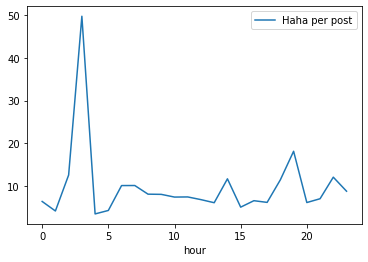

In [42]:
df_merge.plot(y='Haha per post', use_index=True)

**Care Reaction Per Post:**

In [43]:
df_merge['Care per post']=df_merge['Care']/df_merge['Post Created']
df_merge['Care per post'].sort_values(ascending=False)

hour
7     1.301562
6     0.724520
19    0.701530
1     0.626937
9     0.593567
22    0.556885
18    0.545587
16    0.518542
8     0.517521
23    0.513183
4     0.511006
21    0.498265
20    0.490083
13    0.489810
11    0.485118
12    0.481894
10    0.448071
17    0.430194
5     0.428431
14    0.427040
15    0.415814
3     0.402913
2     0.290188
0     0.270670
Name: Care per post, dtype: float64

<AxesSubplot:xlabel='hour'>

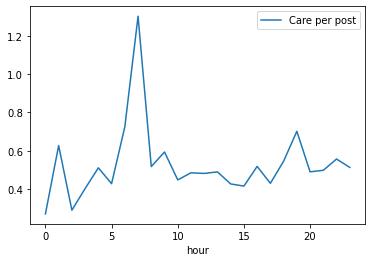

In [44]:
df_merge.plot(y='Care per post', use_index=True)

**Sad Reaction Per Post:**

In [45]:
df_merge['Sad per post']=df_merge['Sad']/df_merge['Post Created']
df_merge['Sad per post'].sort_values(ascending=False)

hour
1     3.382002
4     2.259434
17    1.793079
2     1.704593
23    1.703357
12    1.637712
20    1.506402
16    1.460267
18    1.394603
19    1.380267
22    1.220770
13    1.185446
10    1.182900
7     1.178822
5     1.175490
21    1.161612
3     1.155340
6     1.110387
11    1.033433
15    0.977431
14    0.975336
0     0.848161
8     0.833447
9     0.813558
Name: Sad per post, dtype: float64

<AxesSubplot:xlabel='hour'>

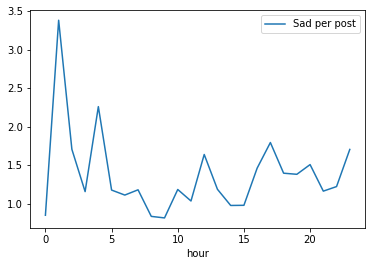

In [46]:
df_merge.plot(y='Sad per post', use_index=True)

**Angry Reaction Per Post:**

In [47]:
df_merge['Angry per post']=df_merge['Angry']/df_merge['Post Created']
df_merge['Angry per post'].sort_values(ascending=False)

hour
22    4.150209
3     3.671521
9     2.055799
6     1.823185
23    1.798156
8     1.766976
7     1.617636
19    1.340608
12    1.315408
11    1.301567
10    1.297340
14    1.164393
15    1.140661
13    1.127267
16    1.121267
20    1.048833
1     1.038141
21    1.026935
17    1.020335
18    1.006425
0     0.928010
5     0.841176
4     0.836478
2     0.436326
Name: Angry per post, dtype: float64

<AxesSubplot:xlabel='hour'>

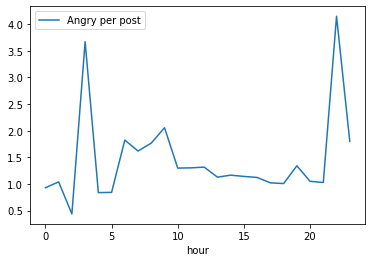

In [48]:
df_merge.plot(y='Angry per post', use_index=True)

**Total Views per hour:**

<AxesSubplot:xlabel='hour'>

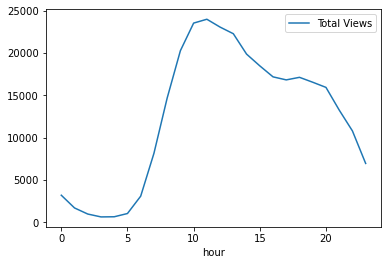

In [49]:
df_hour_grouped.plot(y='Total Views', use_index=True)

In [50]:
df_hour_grouped_sum['Total Views'].sort_values(ascending=False)

hour
10    262007617.0
11    139184170.0
7     125238386.0
9     124943031.0
8     108608481.0
12     76878343.0
19     47255240.0
15     44922970.0
18     43460353.0
20     41109088.0
13     37439810.0
22     34789772.0
16     34093874.0
17     24123385.0
14     21845583.0
0      21140748.0
21     19040775.0
23     16003011.0
1      10850089.0
6       8667466.0
5       4364329.0
3       1660890.0
2       1574170.0
4        496346.0
Name: Total Views, dtype: float64

In [51]:
df_hour_grouped_sum['Total Views'].describe()

count    2.400000e+01
mean     5.207075e+07
std      6.111126e+07
min      4.963460e+05
25%      1.471478e+07
50%      3.444182e+07
75%      5.466102e+07
max      2.620076e+08
Name: Total Views, dtype: float64

**Correlation Matrix**

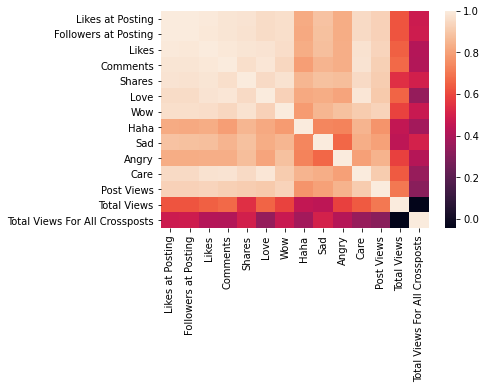

In [52]:
df_corr=df_hour_grouped_sum.drop(columns=['Facebook Id', 'Sponsor Id', 'day','week', 'month'])
corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

# **Tipo de posteo (comentario, publicación, video, posteo con foto).**

In [53]:
df_aux_tipo=df[['Post Created','Video Length','Image Text','Link','Sponsor Id', 'Message']]
#Video
df_aux_tipo['Video']=df_aux_tipo['Video Length'].isnull()
df_aux_tipo.loc[df_aux_tipo['Video'] == False, 'Video'] = "Video"
df_aux_tipo.loc[df_aux_tipo['Video'] == True, 'Video'] = ''  
#Image
df_aux_tipo['Image']=df_aux_tipo['Image Text'].isnull()
df_aux_tipo.loc[df_aux_tipo['Image'] == False, 'Image'] = "Image"
df_aux_tipo.loc[df_aux_tipo['Image'] == True, 'Image'] = ''  
#Message
df_aux_tipo['Messages']=df_aux_tipo['Message'].isnull()
df_aux_tipo.loc[df_aux_tipo['Messages'] == False, 'Messages'] = "Message"
df_aux_tipo.loc[df_aux_tipo['Messages'] == True, 'Messages'] = ''  
#Type of post
df_aux_tipo['Tipo']=df_aux_tipo['Image']+df_aux_tipo['Messages']+df_aux_tipo['Video']
df_aux_tipo


df_tipo_grouped=df_aux_tipo.groupby(by=['Tipo']).count()



<ipython-input-53-cb543727d3cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux_tipo['Video']=df_aux_tipo['Video Length'].isnull()
/Users/rodrigojuarez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-53-cb543727d3cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [54]:
df_tipo_grouped['Post Created'].sort_values(ascending=False)

Tipo
Message              179738
ImageMessage          59754
MessageVideo          35336
                      14332
Image                  7378
Video                  3453
ImageMessageVideo         7
Name: Post Created, dtype: int64

# **Analisis de Usuarios**

In [55]:
# posts por user
#df.groupby(['User Name']).head()

df_users = df['User Name']
pd.Series(df_users.unique()).count()
df_users.describe()

count           282635
unique           15702
top       COVID19MXSOS
freq               852
Name: User Name, dtype: object

In [56]:
frecuencias = df_users.value_counts()
frecuencias.describe()

count    15702.000000
mean        17.999936
std         41.559289
min          1.000000
25%          1.000000
50%          3.000000
75%         14.000000
max        852.000000
Name: User Name, dtype: float64

In [57]:
# numero de cuentas que publican mas que el promedio
frecuencias[frecuencias>frecuencias.mean()].count()

3490

In [58]:
# numero de cuentas que publican 1 sola vez
frecuencias[frecuencias==1].count() 

5178

## **Análisis de usuarios vs. frecuencia de publicación vs. tiempo**

In [59]:
df_byUserName=df.groupby(by=['User Name', 'Post Created Date']).count()
print(df_byUserName['Post Created'])

User Name      Post Created Date
070Informatel  2021-08-16           2
               2021-08-17           1
               2021-08-18           1
               2021-08-21           1
               2021-08-22           1
                                   ..
zumpangonet    2021-10-07           1
               2021-10-10           1
               2021-10-12           2
               2021-10-14           1
               2021-10-15           1
Name: Post Created, Length: 158394, dtype: int64


In [60]:
print(df_byUserName['Post Created'].describe())

count    158394.000000
mean          1.784379
std           1.560602
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          40.000000
Name: Post Created, dtype: float64


### **Referencias**


[How do you calculare overperforming scores](https://help.crowdtangle.com/en/articles/2013937-how-do-you-calculate-overperforming-scores)